In [9]:
import numpy as np
import population
import copy
import time
import matplotlib.pyplot as plt

In [10]:
size_of_population = 20
max_generated_value = 100 

In [11]:
def crossover_test(population_test):
    population_ = copy.deepcopy(population_test)
    parent1, parent2, child1, child2 = population_.crossover()

    # print("Parent 1 quality: ", parent1.quality())
    # parent1.display()
    # print("Valid:   ", (np.sum(parent1.matrix, axis=0) == cols_).all() and (np.sum(parent1.matrix, axis=1) == rows_).all())
    # print("Parent 2 quality: ", parent2.quality())
    # parent2.display()
    # print("Valid:   ", (np.sum(parent2.matrix, axis=0) == cols_).all() and (np.sum(parent2.matrix, axis=1) == rows_).all())

    # print("Child 1 quality: ", child1.quality())
    # child1.display()
    # print("Valid:   ", (np.sum(child1.matrix, axis=0) == cols_).all() and (np.sum(child1.matrix, axis=1) == rows_).all())
    # print("Child  2 quality: ", child2.quality())
    # child2.display()
    # print("Valid:   ", (np.sum(child2.matrix, axis=0) == cols_).all() and (np.sum(child2.matrix, axis=1) == rows_).all())

    return parent1, parent2, child1, child2

def crossover_test_time(size_of_specimen):
    problem_matrix = np.random.randint(low=0, high=max_generated_value, size=(size_of_specimen, size_of_specimen))
    np.fill_diagonal(problem_matrix, 0)

    # initialize of population
    population_ = population.Population(size=size_of_population)
    population_.make_population(problem_matrix)
    start = time.time()
    population_.crossover()
    return time.time() - start

def crossover_test_conver(size_of_specimen_):
    problem_matrix = np.random.randint(low=0, high=max_generated_value, size=(size_of_specimen_, size_of_specimen_))
    np.fill_diagonal(problem_matrix, 0)

    # initialize of population
    population_ = population.Population(size=size_of_population)
    population_.make_population(problem_matrix)

    return population_.crossover()

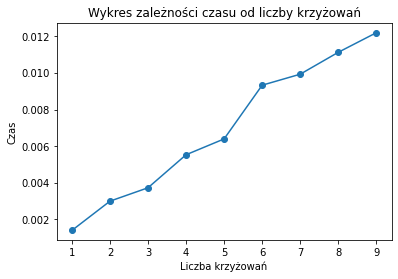

In [12]:
# Test 1 sprawdzenie czas[liczby krzyżowań]
def test_1():
    size_of_specimen = 5
    problem_matrix = np.random.randint(low=0, high=max_generated_value, size=(size_of_specimen, size_of_specimen))
    np.fill_diagonal(problem_matrix, 0)

    # initialize of population
    population_ = population.Population(size=size_of_population)
    population_.make_population(problem_matrix)

    time_list = []
    table_num_cross = [i for i in range(1, 10)]

    for x in table_num_cross:
        temp_ = 0
        for y in range(15):
            start = time.time()
            for i in range(0, x):
                crossover_test(population_)
            temp_ += time.time() - start
        time_list.append(temp_/15)

    plt.plot(table_num_cross, time_list, "-o")
    plt.title("Wykres zależności czasu od liczby krzyżowań")
    plt.xlabel("Liczba krzyżowań")
    plt.ylabel("Czas")
    plt.show()

test_1()

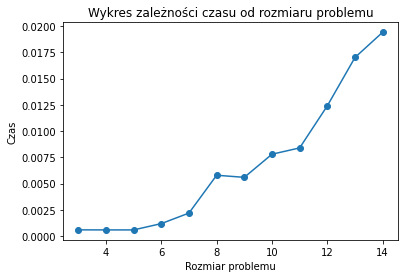

In [13]:
# Test 2. Sprawdzenie czas[rozmiar problemu]
def test_2():
    time_crossover = []
    number_of_specimen = []
    for si_spec in range(3, 15):
        sum1 = 0
        problem_matrix_s = np.random.randint(low=0, high=max_generated_value, size=(si_spec, si_spec))
        np.fill_diagonal(problem_matrix_s, 0)

        # initialize of population
        population_ = population.Population(size=size_of_population)
        population_.make_population(problem_matrix_s)
        for replay in range(5):
            start1 = time.time()
            population_.crossover()
            time_cross = time.time() - start1
            sum1 += time_cross
        time_crossover.append(sum1/5)
        number_of_specimen.append(si_spec)
    plt.plot(number_of_specimen, time_crossover, "-o")
    plt.title("Wykres zależności czasu od rozmiaru problemu")
    plt.xlabel("Rozmiar problemu")
    plt.ylabel("Czas")
    plt.show()

test_2()

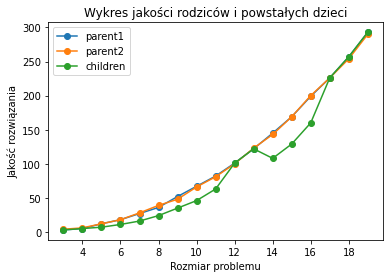

In [14]:
# Test 3. Sprawdzenie zbieżności algorytmu
def test_3():
    parent_quality = []
    child_quality = []
    xvalue = [i for i in range(3, 20)]
    for i in range(3, 20):
        parent1, parent2, child1, child2 = crossover_test_conver(i)
        parent_quality.append([parent1.quality(), parent2.quality()])
        child_quality.append([child1.quality(), child2.quality()])

    parent1 = [par[0] for par in parent_quality]
    parent2 = [par[1] for par in parent_quality]

    child1 = [chl[0] for chl in child_quality]

    plt.plot(xvalue, parent1, "o-")
    plt.plot(xvalue, parent2, "o-")
    plt.plot(xvalue, child1, "o-")
    plt.title("Wykres jakości rodziców i powstałych dzieci")
    plt.legend(labels=['parent1', 'parent2', 'children'])
    plt.xlabel("Rozmiar problemu")
    plt.ylabel("Jakość rozwiązania")
    plt.show()

test_3()

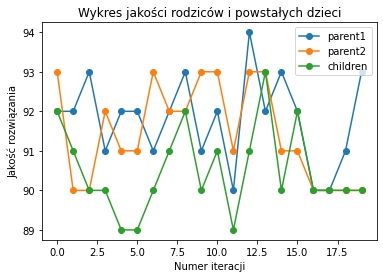

In [36]:
# Test dodatkowy dla macierzy rzadkiej
def generate_initial_matrix(max_generated_value, size_of_matrix, density_coefficient):
    dense_matrix = np.random.randint(low=0, high=max_generated_value, size=(size_of_matrix, size_of_matrix))
    np.fill_diagonal(dense_matrix, 0)
    return dense_matrix - dense_matrix * (dense_matrix > (density_coefficient/100 * max_generated_value))

def test_4():
    problem_matrix = generate_initial_matrix(100, 10, 15)

    # initialize of population
    population_ = population.Population(size=size_of_population)
    population_.make_population(problem_matrix)
    
    parent_quality = []
    child_quality = []

    for i in range(20):
        pop = copy.deepcopy(population_)
        parent1, parent2, child1, child2 = pop.crossover()
        parent_quality.append([parent1.quality(), parent2.quality()])
        child_quality.append(child1.quality())

    parent1 = [par[0] for par in parent_quality]
    parent2 = [par[1] for par in parent_quality]

    plt.plot(parent1, "o-")
    plt.plot(parent2, "o-")
    plt.plot(child_quality, "o-")
    plt.title("Wykres jakości rodziców i powstałych dzieci")
    plt.legend(labels=['parent1', 'parent2', 'children'])
    plt.xlabel("Numer iteracji")
    plt.ylabel("Jakość rozwiązania")
    plt.show()

test_4()
    